# 3. Polynomial Regression

## 공부 시간에 따른 시험 점수 (우등생)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
datasets = pd.read_csv('PolynomialRegressionData.csv')
X = datasets.iloc[:,:-1].values
y = datasets.iloc[:,-1].values

In [7]:
datasets.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

### 데이터 시각화

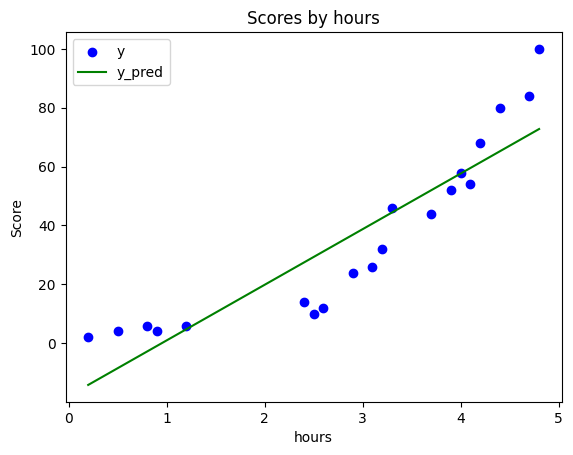

In [10]:
plt.scatter(X, y, color = 'b')
plt.plot(X, lr.predict(X), color = 'g')
plt.title('Scores by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.legend(['y', 'y_pred'])
plt.show()

In [11]:
lr.score(X, y)

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_lr = PolynomialFeatures(degree = 4) # 4차
X_poly = poly_lr.fit_transform(X)
print(X[:5])
print(X_poly[:5]) # X^0, X^1, X^2, X^3, X^4

[[0.2]
 [0.5]
 [0.8]
 [0.9]
 [1.2]]
[[1.0000e+00 2.0000e-01 4.0000e-02 8.0000e-03 1.6000e-03]
 [1.0000e+00 5.0000e-01 2.5000e-01 1.2500e-01 6.2500e-02]
 [1.0000e+00 8.0000e-01 6.4000e-01 5.1200e-01 4.0960e-01]
 [1.0000e+00 9.0000e-01 8.1000e-01 7.2900e-01 6.5610e-01]
 [1.0000e+00 1.2000e+00 1.4400e+00 1.7280e+00 2.0736e+00]]


In [15]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

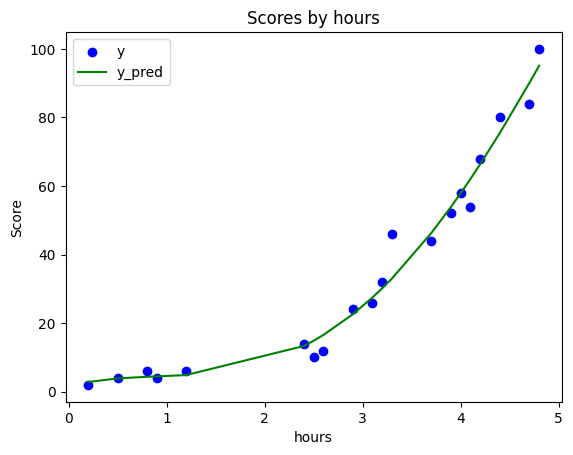

In [17]:
plt.scatter(X, y, color = 'b')
plt.plot(X, poly_reg.predict(X_poly), color = 'g')
plt.title('Scores by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.legend(['y', 'y_pred'])
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [18]:
# 단순 선형 회귀
lr.predict([[2]]) # 2시간 공부했을 때의 점수 예측값

array([19.85348988])

In [20]:
# 다항 선형 회귀
poly_reg.predict(poly_lr.fit_transform([[2]]))  # 2시간 공부했을 때의 점수 예측값

array([8.70559135])

In [21]:
print('단순 선형 회귀 예측 score: ', lr.score(X, y))
print('다항 선형 회귀 예측 score: ', poly_reg.score(X_poly, y))

단순 선형 회귀 예측 score:  0.8169296513411765
다항 선형 회귀 예측 score:  0.9782775579000045


* 단순 선형회귀 에측 대비 다항 선형 회귀로 예측했을 때 성능이 개선되었음을 확인함.